In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# DATA PREPARATION

In [4]:
data = pd.read_csv("../datasets/MNIST-2/mnist_train.csv")

In [9]:
data_ = data.values
X = data_[:10000,1:]
y = data_[:10000,0]

In [11]:
X.shape,y.shape

((10000, 784), (10000,))

# RESHAPE X INTO 28*28 MATRIX FOR PLOTTING

In [19]:
X = X.reshape((-1,28,28))
X.shape

(10000, 28, 28)

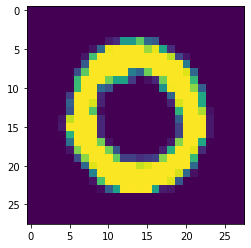

In [20]:
plt.imshow(X[1])

# AGAIN RESHAPE X INTO 784 COLUMNS

In [22]:
X= X.reshape((-1,784))
X.shape

(10000, 784)

# SKLEARN TO IMPORT standardScalar()
- this normalize the data

In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
sc = StandardScaler()

In [26]:
X_ = sc.fit_transform(X)
X_.shape

(10000, 784)

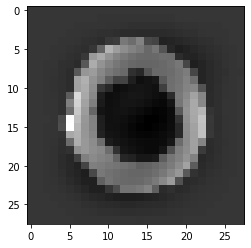

In [30]:
plt.imshow(X_[1].reshape(28,28),cmap='gray')

# SKLEARN PCA

In [31]:
from sklearn.decomposition import PCA

we want 784D to 2D

In [33]:
pca = PCA(n_components=2)

We will use X_ bcz it is preprocessed

In [34]:
Z_pca = pca.fit_transform(X_)

In [36]:
print(Z_pca.shape)
print(Z_pca)

(10000, 2)
[[-4.94973815 -5.44812742]
 [18.96634926  6.83391873]
 [-7.52795079 -2.05105544]
 ...
 [-1.54627557 -5.23572634]
 [ 2.42565865 18.98066137]
 [-0.22647004  9.90094481]]


explained_variance()
- This shows percentages of variance
- here we lost 30 percent

In [37]:
pca.explained_variance_

array([40.71864956, 28.7929927 ])

# CUSTOM PCA
- we will now use formulas to get PCA

### Step1 - Precprocessing (already done)
### Step2 - Covariance Matrix
### Step3 - Compute Eigen Vector
### Step4 - get Z by multiplying U_red and X

In [74]:
#this trick basically gives us covariance matrix
cov_mat = np.dot(X_.T,X_)
print(cov_mat.shape)
# using np.cov to get covariance matrix
cov = np.cov(X_.T)
print(cov.shape)

(784, 784)
(784, 784)


In [76]:
from numpy.linalg import svd
U,S,V = svd(cov_mat)
print(U.shape)
U_reduced = U[:,:2]
print(U_reduced.shape)

(784, 784)
(784, 2)


In [82]:
Z = np.dot(X_,U_reduced)
print(Z.shape)
print(Z)

(10000, 2)
[[  4.94972512   5.44806854]
 [-18.96637194  -6.83397157]
 [  7.52793502   2.05100764]
 ...
 [  1.54624293   5.23560819]
 [ -2.42572751 -18.98113797]
 [  0.22648625  -9.90093373]]


# DATA VISUALIZATION

put label y at end column

In [84]:
new_data = np.hstack((Z,y.reshape(-1,1)))

In [85]:
df = pd.DataFrame(new_data,columns=['PC1','PC2','label'])

In [86]:
df.head()

,PC1,PC2,label
0,4.949725,5.448069,1.0
1,-18.966372,-6.833972,0.0
2,7.527935,2.051008,1.0
3,0.715448,-5.555069,4.0
4,-26.253689,-7.291958,0.0


<Figure size 2160x1440 with 0 Axes>

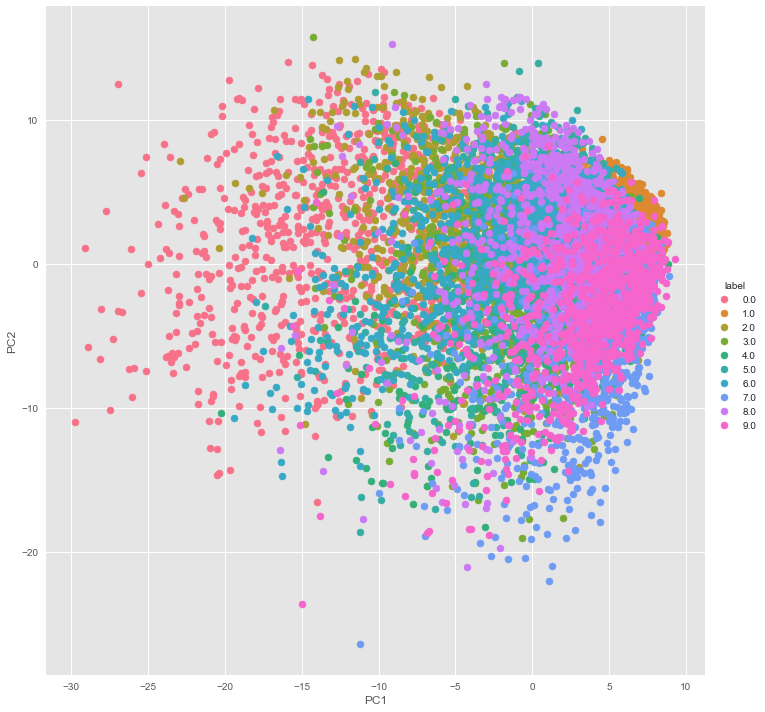

In [118]:
import seaborn as sns
plt.figure(figsize=(30,20))
fg = sns.FacetGrid(df,hue="label",height=10)
fg.map(plt.scatter,"PC1","PC2")
fg.add_legend()

# PCA with all the dimensions preserved ie 784

In [120]:
pca = PCA()

In [121]:
Z_pca = pca.fit_transform(X_)

In [122]:
Z_pca.shape

(10000, 784)

We will find cummulative sum and check when variane reaches 90%

In [127]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

In [131]:
cum_sum[cum_sum<=0.91]

array([0.06031789, 0.10296991, 0.14326816, 0.17436629, 0.2010936 ,
       0.22455997, 0.24465639, 0.26324363, 0.27978887, 0.29445273,
       0.30865195, 0.32143412, 0.33343457, 0.34533556, 0.35654862,
       0.36731615, 0.37731403, 0.38701108, 0.39658625, 0.40590861,
       0.41488353, 0.42337177, 0.43162821, 0.43957891, 0.44734056,
       0.45470523, 0.46203637, 0.46909783, 0.47595393, 0.48260484,
       0.48914783, 0.49561252, 0.50193969, 0.50811747, 0.51415982,
       0.52007769, 0.525955  , 0.53175191, 0.53730214, 0.54267999,
       0.54800624, 0.55330571, 0.55848877, 0.56356665, 0.56850064,
       0.57331619, 0.57807384, 0.58275837, 0.587341  , 0.59187742,
       0.59635122, 0.60079082, 0.60510678, 0.60933372, 0.61351066,
       0.61757373, 0.62160395, 0.62558544, 0.62951792, 0.63337967,
       0.63715011, 0.64084564, 0.64448207, 0.64811352, 0.65169849,
       0.65518069, 0.65864002, 0.66205224, 0.6654211 , 0.66875398,
       0.6720299 , 0.67529093, 0.67854343, 0.6817633 , 0.68486

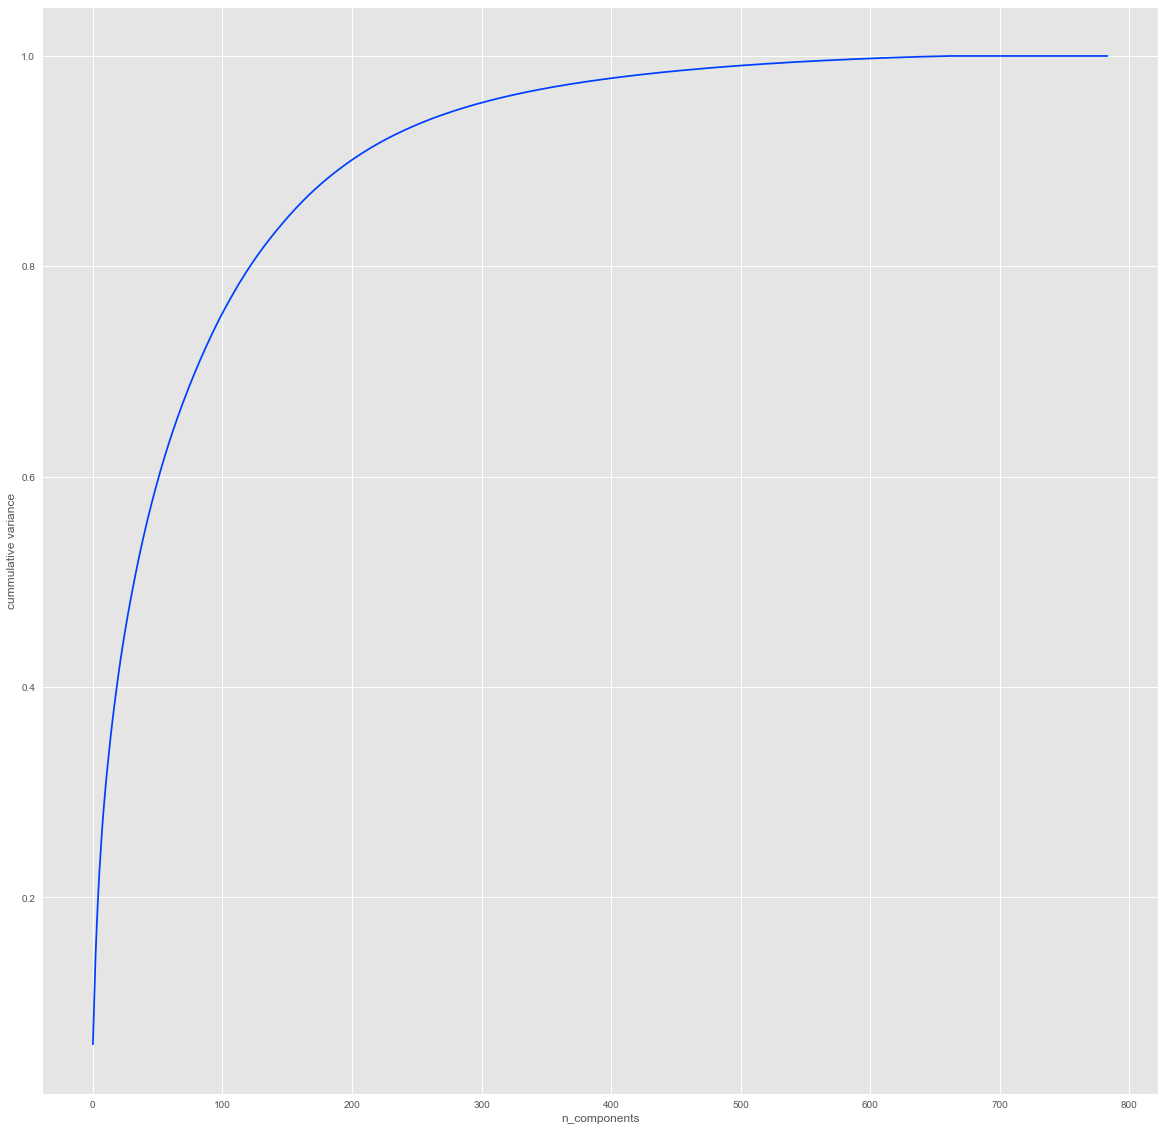

In [132]:
plt.figure(figsize=(20,20))
plt.plot(cum_sum)
plt.xlabel("n_components")
plt.ylabel("cummulative variance")
plt.show()



above graph reaches 90% variance on 200dimensions so we can reduce 784-200 and then train our model